# Assignment 6: Weather

### Author: Aoife Flavin

This notebook contains seven plots representing weather data gathered at Knock airport between 1996 and 2024.
The seven plots are as follows:
1. Air Temperature Over Time (1996 - 2024)
2. Mean Daily Air Temperature (2020 - 2024)
3. Monthly Mean Temperature (1996 - 2024)
4. Mean Monthly Windspeed (2018 - 2024)
5. Rolling Windspeed over 24 hours on 21 January 2024
6. Maximum daily Windspeed in 2023
7. Monthly Mean of Daily Max Windspeeds in 2023


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

Downlaod the dataset and skip the initial rows which don't contain the data

In [21]:
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)
df.head()

C:\Users\aoife.000\AppData\Local\Temp\ipykernel_4884\3767566514.py:1: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


Clean the data

In [22]:
df.columns = [
    "Date and Time (UTC)", "Indicator 1", "Precipitation Amount (mm)", "Indicator 2",
    "Air Temperature (C)", "Indicator 3", "Wet Bulb Temperature (C)", 
    "Dew Point Temperature (C)", "Vapour Pressure (hPa)", 
    "Relative Humidity (%)", "Mean Sea Level Pressure (hPa)", 
    "Indicator 4", "Mean Wind Speed (knot)", "Indicator 5", 
    "Predominant Wind Direction (degree)", "Synop Code for Present Weather", 
    "Synop Code for Past Weather", "Sunshine Duration (hours)", 
    "Visibility (m)", "Cloud Height (100's of ft)", 
    "Cloud Amount"
]
df.head()

,Date and Time (UTC),Indicator 1,Precipitation Amount (mm),Indicator 2,Air Temperature (C),Indicator 3,Wet Bulb Temperature (C),Dew Point Temperature (C),Vapour Pressure (hPa),Relative Humidity (%),...,Indicator 4,Mean Wind Speed (knot),Indicator 5,Predominant Wind Direction (degree),Synop Code for Present Weather,Synop Code for Past Weather,Sunshine Duration (hours),Visibility (m),Cloud Height (100's of ft),Cloud Amount
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


## Air Tempeature Over Time (1996 - 2024)

Make sure that Temperature is all numeric and get rid of any missing values

In [23]:
df['Air Temperature (C)'] = pd.to_numeric(df['Air Temperature (C)'], errors='coerce')
df_cleaned = df.dropna(subset=['Air Temperature (C)']) 

Convert Date and Time to datetime

In [24]:
df_cleaned['Date and Time (UTC)'] = pd.to_datetime(df_cleaned['Date and Time (UTC)'], format='%d-%b-%Y %H:%M', errors='coerce')

Create the plot

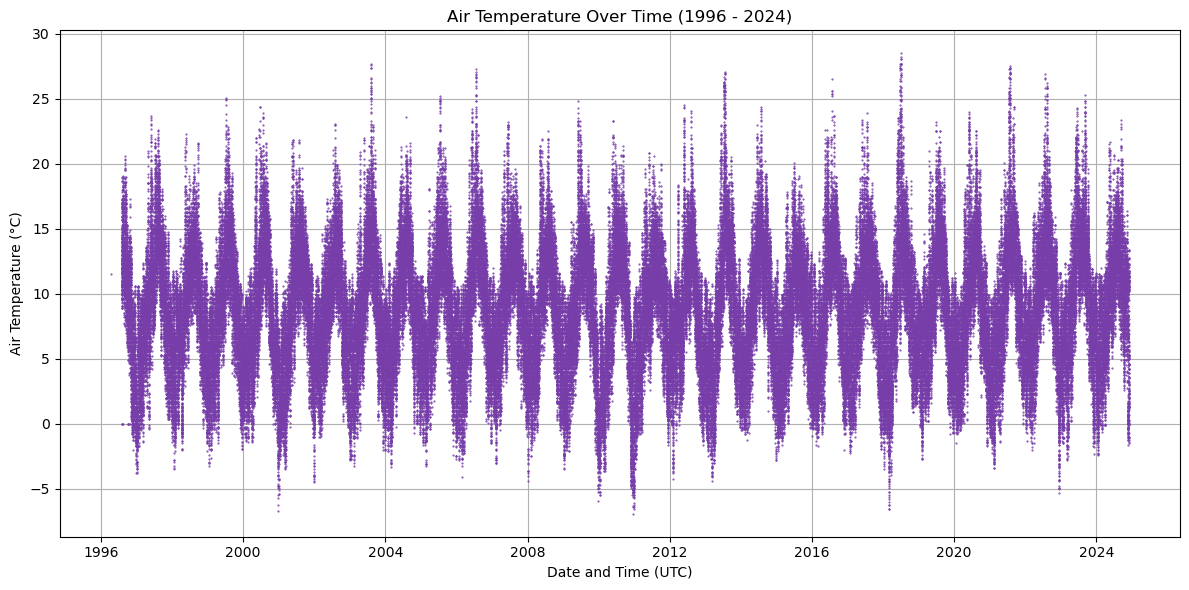

In [64]:
# Plot the Air Temperature over Date and Time
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date and Time (UTC)'], df_cleaned['Air Temperature (C)'], marker='o', linestyle=' ', color='#773ea9', markersize=0.5)
plt.title('Air Temperature Over Time (1996 - 2024)')
plt.xlabel('Date and Time (UTC)')
plt.ylabel('Air Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Mean Daily Air Temperature (2020 - 2024)

Extract the date and calculate the mean

In [26]:
#data for 2020 to 2024
filtered_data = df_cleaned[(df_cleaned['Date and Time (UTC)'] >= '2020-01-01') & 
                           (df_cleaned['Date and Time (UTC)'] <= '2024-12-31')].copy()

# date part only
filtered_data['Date'] = filtered_data['Date and Time (UTC)'].dt.date

# Group by date an calculate daily mean temp
daily_mean_temp = filtered_data.groupby('Date')['Air Temperature (C)'].mean()

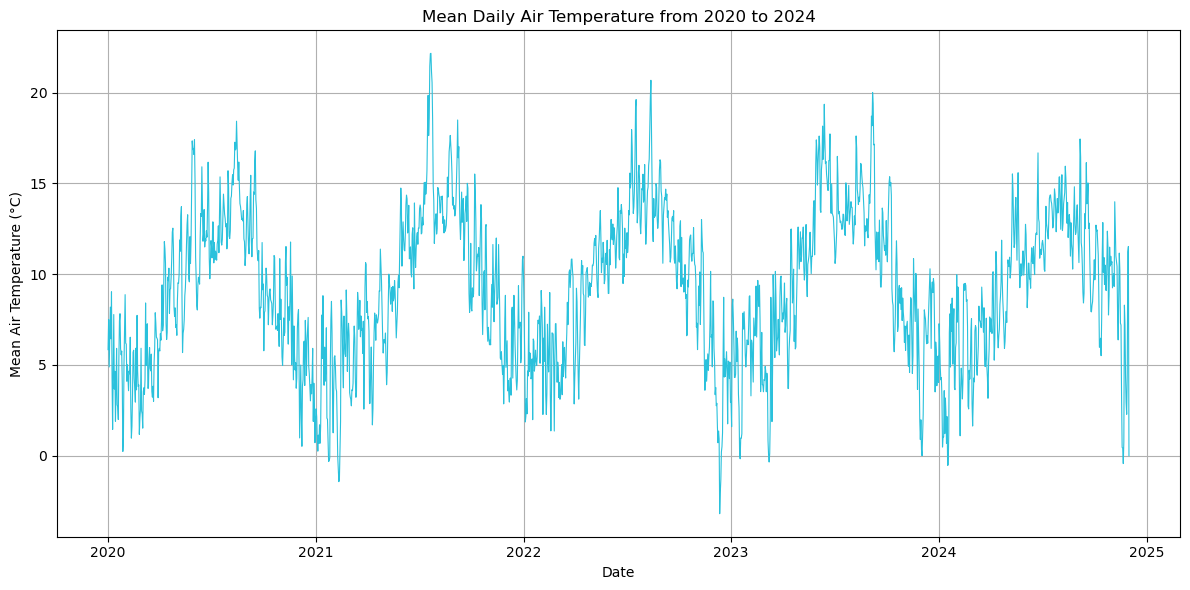

In [52]:
# Plot daily mean temp
plt.figure(figsize=(12, 6))
plt.plot(daily_mean_temp.index, daily_mean_temp.values, color='#2ac1dc', linewidth=0.8)
plt.title('Mean Daily Air Temperature from 2020 to 2024')
plt.xlabel('Date')
plt.ylabel('Mean Air Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Monthly Mean Temperature (1996 - 2024)

In [ ]:
# Take out the month and year
df_cleaned['Month-Year'] = df_cleaned['Date and Time (UTC)'].dt.to_period('M')

# Calculate mean temp
monthly_mean_temp = df_cleaned.groupby('Month-Year')['Air Temperature (C)'].mean()

print(monthly_mean_temp)

Month-Year
1996-04    11.500000
1996-07    12.650000
1996-08    12.946909
1996-09    12.174306
1996-10     9.614113
             ...    
2024-08    13.233333
2024-09    11.741389
2024-10     9.966263
2024-11     7.449722
2024-12     0.000000
Freq: M, Name: Air Temperature (C), Length: 343, dtype: float64


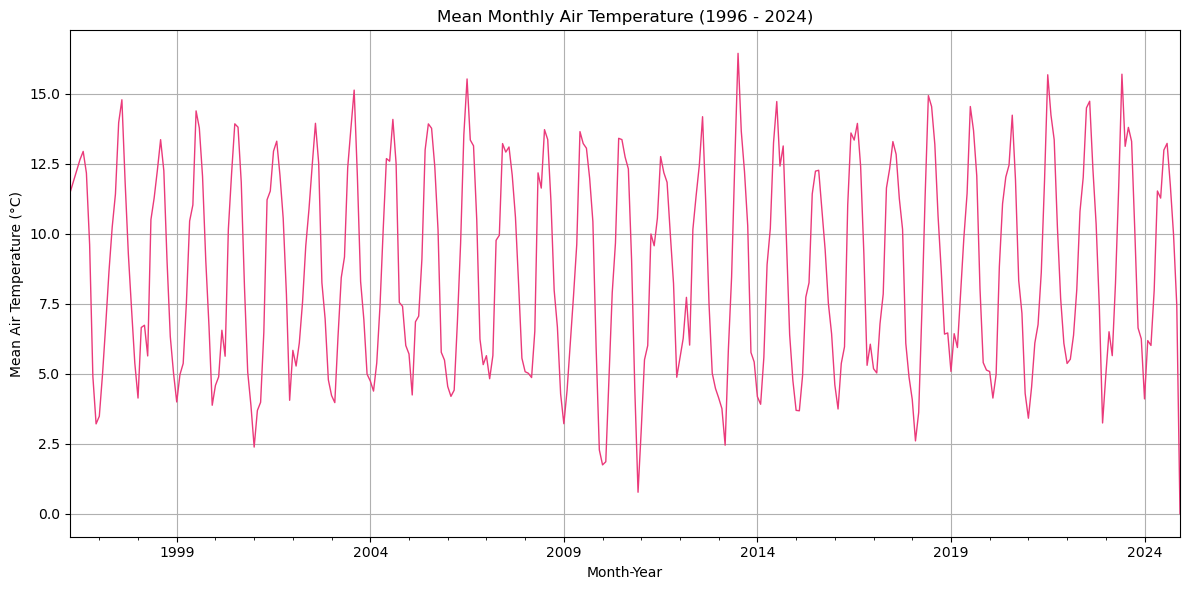

In [63]:
# Plot the monthly mean temp
plt.figure(figsize=(12, 6))
monthly_mean_temp.plot(kind='line', color='#ea3a7a', linewidth=1)
plt.title('Mean Monthly Air Temperature (1996 - 2024)')
plt.xlabel('Month-Year')
plt.ylabel('Mean Air Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Plot of the Mean Monthly Windspeed (2018 - 2024)

In [30]:
# Treat blanks as NaN
df['Mean Wind Speed (knot)'] = pd.to_numeric(df['Mean Wind Speed (knot)'], errors='coerce')

# drop rows where windspeed is NaN
df_cleaned = df.dropna(subset=['Mean Wind Speed (knot)'])

# Convert to datetime
df_cleaned['Date and Time (UTC)'] = pd.to_datetime(df_cleaned['Date and Time (UTC)'], format='%d-%b-%Y %H:%M', errors='coerce')

# Filter data for 2018 to 2024
filtered_data = df_cleaned[(df_cleaned['Date and Time (UTC)'] >= '2018-01-01') & 
                           (df_cleaned['Date and Time (UTC)'] <= '2024-12-31')].copy()

# avoid copy warning
filtered_data.loc[:, 'Month-Year'] = filtered_data['Date and Time (UTC)'].dt.to_period('M')

# Calculate mean wind speed
monthly_mean_wind_speed = filtered_data.groupby('Month-Year')['Mean Wind Speed (knot)'].mean()


C:\Users\aoife.000\AppData\Local\Temp\ipykernel_4884\2461419637.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date and Time (UTC)'] = pd.to_datetime(df_cleaned['Date and Time (UTC)'], format='%d-%b-%Y %H:%M', errors='coerce')


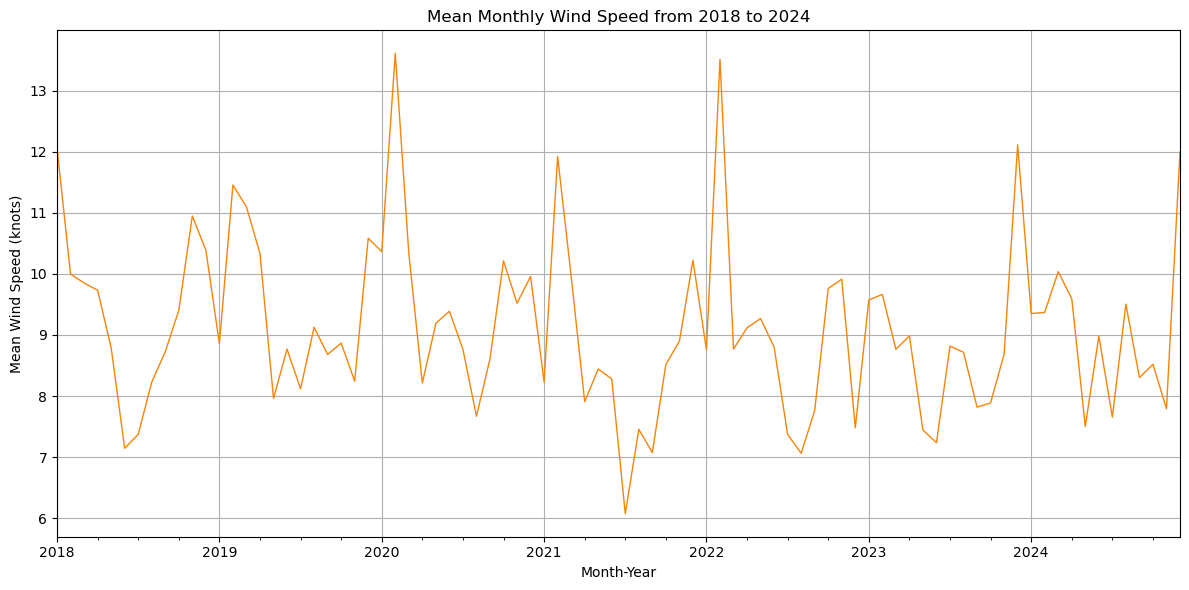

In [60]:
# Plot the monthly mean wind speed
plt.figure(figsize=(12, 6))
monthly_mean_wind_speed.plot(kind='line', color='#f88408', linewidth=1)
plt.title('Mean Monthly Wind Speed from 2018 to 2024')
plt.xlabel('Month-Year')
plt.ylabel('Mean Wind Speed (knots)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Rolling Windspeed Over 24 Hours

In [40]:
# Convert to datetime
df['Date and Time (UTC)'] = pd.to_datetime(df['Date and Time (UTC)'], format='%d-%b-%Y %H:%M', errors='coerce')

#drop rows where windspeed is NaN
df_cleaned = df.dropna(subset=['Mean Wind Speed (knot)'])

# Filter data for 21 Jan 2024
start_date = '2024-01-21'
end_date = '2024-01-22'
filtered_data = df_cleaned[(df_cleaned['Date and Time (UTC)'] >= start_date) & 
                           (df_cleaned['Date and Time (UTC)'] < end_date)]

C:\Users\aoife.000\AppData\Local\Temp\ipykernel_4884\1842956582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Rolling Mean Wind Speed'] = filtered_data['Mean Wind Speed (knot)'].rolling(window=3).mean()


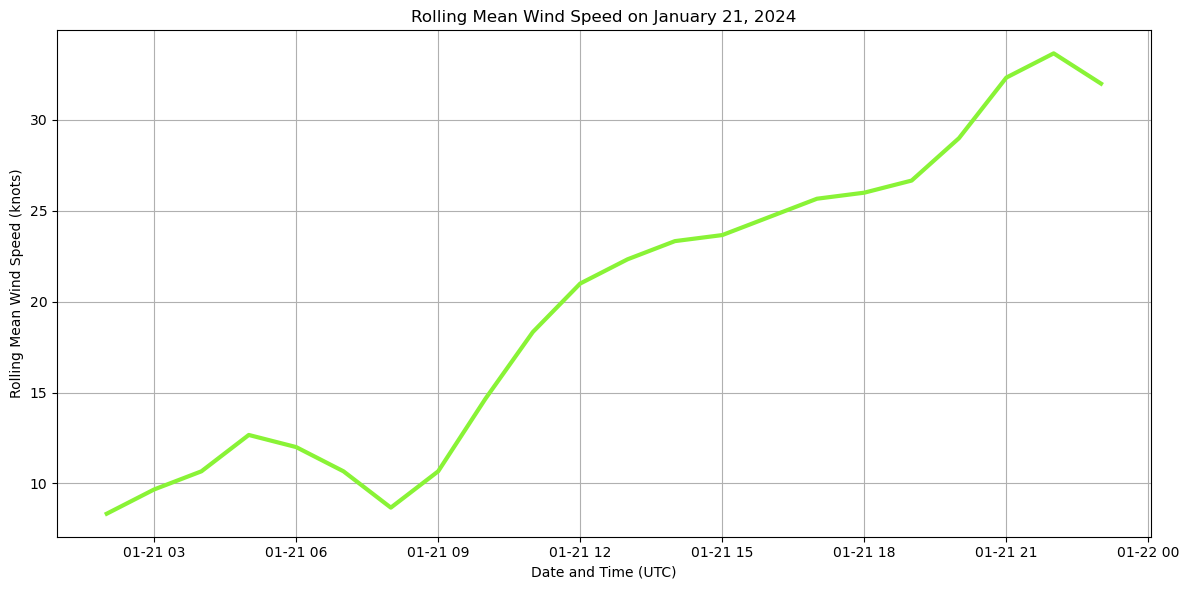

In [ ]:
# Calculate rolling mean
filtered_data['Rolling Mean Wind Speed'] = filtered_data['Mean Wind Speed (knot)'].rolling(window=3).mean()

# Plot the rolling wind speed
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Date and Time (UTC)'], filtered_data['Rolling Mean Wind Speed'], color='#89F336', linewidth=3)
plt.title('Rolling Mean Wind Speed on January 21, 2024')
plt.xlabel('Date and Time (UTC)')
plt.ylabel('Rolling Mean Wind Speed (knots)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Maximum daily Windspeed in 2023

In [43]:
# Filter data for the year 2023
filtered_data_2023 = df[(df['Date and Time (UTC)'].dt.year == 2023)].copy()

# Date part only
filtered_data_2023['Date'] = filtered_data_2023['Date and Time (UTC)'].dt.date

# Calculate max windspeed for each day
max_wind_speed_daily = filtered_data_2023.groupby('Date')['Mean Wind Speed (knot)'].max()

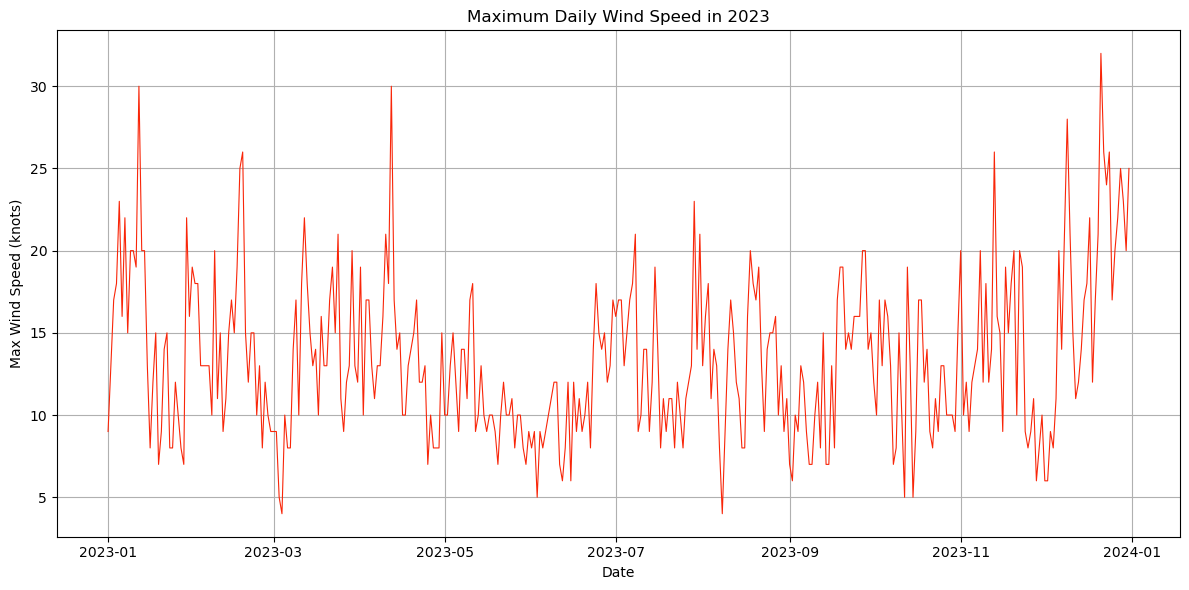

In [ ]:
# Plot max wind speed for each day in 2023
plt.figure(figsize=(12, 6))
plt.plot(max_wind_speed_daily.index, max_wind_speed_daily.values, color='#f92609', linewidth=0.8)
plt.title('Maximum Daily Wind Speed in 2023')
plt.xlabel('Date')
plt.ylabel('Max Wind Speed (knots)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Monthly Mean of Daily Max Windspeeds in 2023

In [45]:
#Filter for 2023
data_2023 = df[(df['Date and Time (UTC)'].dt.year == 2023)].copy()

# date part only
data_2023['Date'] = data_2023['Date and Time (UTC)'].dt.date

# Calculate max windspeed for each day
max_daily_windspeed = data_2023.groupby('Date')['Mean Wind Speed (knot)'].max()

#Conert the index to datetime to use resampling
max_daily_windspeed.index = pd.to_datetime(max_daily_windspeed.index)

# Calculate monthly mean of daily max windspeed
monthly_mean_max_windspeed = max_daily_windspeed.resample('M').mean()

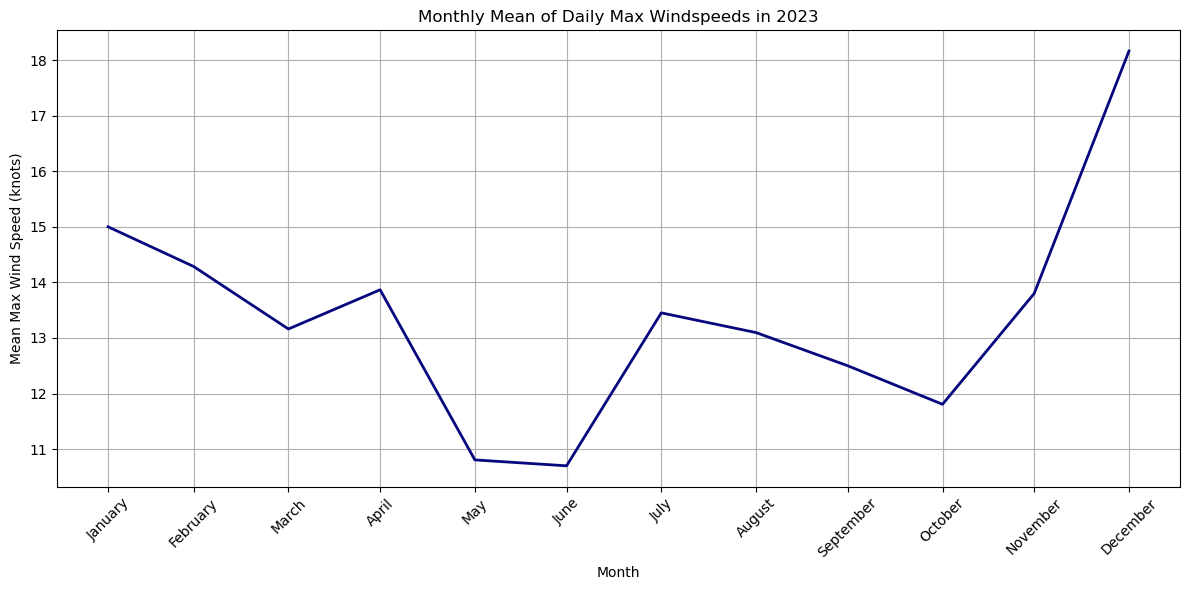

In [65]:
# Plot
plt.figure(figsize= (12, 6))
plt.plot(monthly_mean_max_windspeed.index, monthly_mean_max_windspeed.values, color='#07077e', linewidth=2)
plt.title('Monthly Mean of Daily Max Windspeeds in 2023')
plt.xlabel('Month')
plt.ylabel('Mean Max Wind Speed (knots)')
plt.xticks(monthly_mean_max_windspeed.index, monthly_mean_max_windspeed.index.strftime('%B'), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Sources:
1. https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
2. https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/ 
3. https://www.geeksforgeeks.org/python-pandas-to_numeric-method/
4. https://www.datacamp.com/tutorial/loc-vs-iloc 
5. https://realpython.com/pandas-settingwithcopywarning/
6. https://medium.com/@gfakhira9/to-period-909ee90ce6c1
7. https://www.statology.org/rolling-mean-pandas/
8. https://www.geeksforgeeks.org/select-row-with-maximum-and-minimum-value-in-pandas-dataframe/
9. https://realpython.com/pandas-groupby/
10. https://www.geeksforgeeks.org/python-strftime-function/




End